# Tips Dataset Analysis

## Table of Contents <a class="ancor" id="contents"/>

1. [Introduction](#intro)
1. [Summary Statistics](#summary-stats)
    1. [Numerical Variables](#numerical)
    1. [Categorical Variables](#categorical)
1. [Visualising the Data](#plots)
    1. [Distribution of Tip Amount](#distTip)
    1. [Investigating Tip and Total Bill](#tipBill)
        <br>- [Tip and Total Bill](#tipBill1)
        <br>- [Tip and Total Bill by Gender](#tipBill2)
        <br>- [Tip and Total Bill by Gender and Smoking Table](#tipBill3)
    1. [Distribution of Tip Rate](#tiprate)


## Introduction <a class="ancor" id="intro"/>
This is an analysis of a famous dataset known as the tips dataset. In one particular restaurant, a waiter collected data on all the customers they served over a few months [1].

A server's tips can be greatly influenced by various different things, many of which our waiter recorded! So the big question we are going to try and address throughout this project is do any of these factors affect tip rate, and if so how much do they influence tip rate?

In [127]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Adjust size to make plots a little bigger
plt.rcParams["figure.figsize"] = (15,7)

In [3]:
# Loading the tips dataset from seaborn
tips = sns.load_dataset("tips")

# Load the first few rows to get a look at the data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


After an initial look at the dataset we can see the various columns. The type of data the tips dataset contains is as follows: 

- total_bill = the total bill, including tax, in US dollars
- tip = the tip in US dollars
- sex = the gender of the person paying bill (either male or female)
- smoker = indicates if the table was seated in the smoking area or not
- day = indicates the day on which the meal is served. Clearly the waiter only worked on Thursday, Friday, Saturday and Sundays.
- time = indicate what type of meal they were having either dinner or lunch
- size = how many people were at the table

Because we are looking at tipping, this is normally expressed as a percentage of the bill. Therefore to help with analysis I will be adding a tip rate column to my dataset. 

In [4]:
# Adding tiprate variable to dataset so we can see percentage
tips['tiprate'] = tips.tip/tips.total_bill * 100

So we have taken a first look at our data just to get a sense of it, next we will check a few things to see if we can make any general observations about the data. I'm also going to have a look and see if there is any missing data that might disrupt our analysis.

In [5]:
tips.shape

(244, 8)

In [6]:
# Column names
list(tips)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tiprate']

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
tiprate       244 non-null float64
dtypes: category(4), float64(3), int64(1)
memory usage: 9.1 KB


So we can see our data set has 244 rows and 8 columns (originally 7 but we added the 8th 'tiprate'). We also had a look at the column names, which match up with the descriptions I found earlier for our dataset. There are also no non-nulls meaning no missing data and all of the data types seem fine. So we can start analysing!

## Summary Statistics <a class="ancor" id="summary-stats"/>
### Numerical Variables <a class="ancor" id="numerical"/>

In [8]:
tips.describe()

,total_bill,tip,size,tiprate
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [9]:
print(tips.total_bill.sum())
print(round(tips.tip.sum(), 2))

4827.77
731.58


So from the describe() we can see that the count matches the shape we looked at earlier, so no variables seem to be missing in these columns. 

The average tip is \\$3 and the average tiprate for this restaurant is about 16%. The average bill is about \\$20 dollars, with the lowest bill being \\$3.07 and the highest \\$50.81. 

So it doesn't seem to be a particularly expensive restaurant and the tipping is fairly standard if not a little low (assuming an average tipping rate of 15 - 20\% in USA for standard service). The total takings over the 4 day period is  \\$4827.77 and the total tips taken in was \\$731.58

The average number of people per table is 2.5, with the biggest table seating 6 people and the lowest being 1 person.

In [10]:
tiptotal = tips.sort_values("tiprate", ascending = False)
tiptotal.head(20)

,total_bill,tip,sex,smoker,day,time,size,tiprate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.952481
149,7.51,2.00,Male,No,Thur,Lunch,2,26.631158
93,16.32,4.30,Female,Yes,Fri,Dinner,2,26.348039
221,13.42,3.48,Female,Yes,Fri,Lunch,2,25.931446
51,10.29,2.60,Female,No,Sun,Dinner,2,25.267250


Looking at the top 20 tippers, eyeballing it the biggest tippers seem to be male, at dinner, at the weekend and in a party of 2. Lets investigate some of the categorical variables

### Categorical Variables <a class="ancor" id="categorical"/>

In [11]:
tips.sex
tips["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

So looking at our counts it is clear that more males paid the bill than females.

In [12]:
tips.loc[tips["sex"]=="Male"].mean()
#[2]

total_bill    20.744076
tip            3.089618
size           2.630573
tiprate       15.765055
dtype: float64

The males average tip (15.7%) does not seem to be deviating too much from the average tiprate (16%)

In [13]:
tips.pivot(columns='sex', values='tiprate').describe()

sex,Male,Female
count,157.000000,87.000000
mean,15.765055,16.649074
std,6.477787,5.363173
min,3.563814,5.643341
25%,12.138869,14.041645
50%,15.349194,15.558149
75%,18.623962,19.426621
max,71.034483,41.666667


Comparing men and women, females on average do seem to tip slightly more than males with females tipping 16.6\% and males 15.8\%.

In [14]:
print(tips.groupby(["sex","smoker"])["tiprate"].count().fillna(0).unstack())

smoker  Yes  No
sex            
Male     60  97
Female   33  54


Looking at the counts for gender and smoking tables, there were more non-smoking tables than smoking

In [15]:
tips.loc[tips["smoker"]=="Yes"].mean()

total_bill    20.756344
tip            3.008710
size           2.408602
tiprate       16.319604
dtype: float64

Smoking tables seems similar to the overall averages we observed across the whole dataset above. They have a similar average tiprate of 16%.

In [16]:
tips.pivot(columns='smoker', values='tiprate').describe()

smoker,Yes,No
count,93.000000,151.000000
mean,16.319604,15.932846
std,8.511920,3.990977
min,3.563814,5.679667
25%,10.677083,13.690561
50%,15.384615,15.562472
75%,19.505852,18.501403
max,71.034483,29.198966


Comparing smoking and non-smoking tiprate averages, non-smokering (15.9\%) is lower than smoking (16.3\%).

In [17]:
print(tips.groupby(["sex", "smoker"])["tiprate"].mean().unstack())

smoker        Yes         No
sex                         
Male    15.277118  16.066872
Female  18.215035  15.692097


Female smokers are giving the highest average tip (18.2\%). Male non-smokers gave a higher average tip (16.1\%) than female non-smokers (15.7%).

In [18]:
print(tips.groupby(["day", "time"])["total_bill"].count())

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Dinner    87
Sun   Dinner    76
Name: total_bill, dtype: int64


There were no tables for this waiter at lunch time on Saturday and Sunday. There was only one table at dinner on Thursday. Most of the tables served were Thursday at lunch and Saturday and Sunday at dinner. During the week, there seems to be more people having lunch here than dinner.

In [19]:
tips.pivot(columns='day', values='tiprate').describe()

day,Thur,Fri,Sat,Sun
count,62.000000,19.000000,87.000000,76.000000
mean,16.127563,16.991303,15.315172,16.689729
std,3.865182,4.766531,5.129259,8.473889
min,7.296137,10.355540,3.563814,5.944673
25%,13.820958,13.373871,12.386329,11.998208
50%,15.384615,15.562472,15.183246,16.110332
75%,19.268675,19.663729,18.827082,18.788908
max,26.631158,26.348039,32.573290,71.034483


The average tiprate seems to be highest on Friday at almost 17\%, however there was the lowest amount of customers on Friday (19) and the highest being on Saturday (87). 

In [20]:
print(tips.groupby(["day", "time"])["tiprate"].mean())

day   time  
Thur  Lunch     16.130074
      Dinner    15.974441
Fri   Lunch     18.876489
      Dinner    15.891611
Sat   Dinner    15.315172
Sun   Dinner    16.689729
Name: tiprate, dtype: float64


Looking at the breakdown of tiprate by day of the week and time of day, we see there are no diners for lunch on the weekend. The lowest tip rate is on Saturday night at dinner (15.3\%) and the highest is on Friday at lunch time (18.9\%) but there was only 7 tables at that time

In [21]:
tips.pivot(columns='size', values='tiprate').describe()

size,1,2,3,4,5,6
count,4.000000,156.000000,38.000000,37.000000,5.000000,4.000000
mean,21.729202,16.571919,15.215685,14.594901,14.149549,15.622920
std,8.034186,6.684824,4.545887,4.239533,6.773266,4.215338
min,13.793103,3.563814,5.643341,7.745933,6.565988,10.379905
25%,17.077869,13.522313,12.475755,11.774956,10.657194,13.165446
50%,20.275206,15.610418,15.932311,14.669927,12.138869,16.289124
75%,24.926539,19.503614,18.613473,16.979656,17.219430,18.746598
max,32.573290,71.034483,23.074192,28.053517,24.166264,19.533528


By far the most popular table size is for 2 people (156). There are very few people in dining alone (4) or in tables of 5 (5) or tables of 6 (4).

In [22]:
print(tips.groupby(["size"])["tiprate"].mean())

size
1    21.729202
2    16.571919
3    15.215685
4    14.594901
5    14.149549
6    15.622920
Name: tiprate, dtype: float64


People dining alone seem to be the highest tippers (21.7\%) however as noted above there isn't alot of them. Tables of 2, 3, 4 seem to show a decreasing trend in tiprate as the table size increases.

 # Visualising Data <a class="ancor" id="plots"/>

## Distribution of Tip Amount <a class="ancor" id="distTip"/>

Text(0.5, 1.0, 'Tip ($) Distribution')

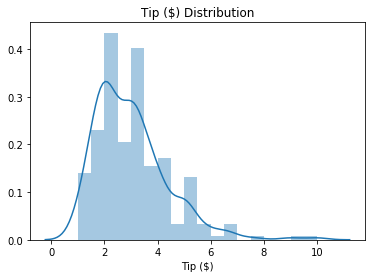

In [26]:
sns.distplot(tips["tip"])
plt.xlabel("Tip ($)")
plt.title("Tip ($) Distribution")

The general shape of the data seems to be skewed to the left, which suggests that there were more smaller tips than larger tips. There are no tips that are less than \\$1.

Text(0.5, 1.0, 'Closer Look at Tip($) Distribution')

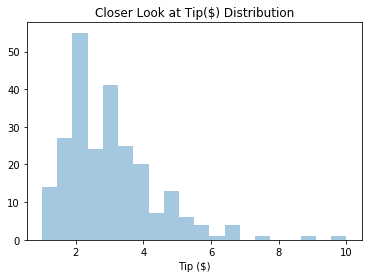

In [28]:
sns.distplot(tips['tip'], kde=False, bins=20);
plt.xlabel("Tip ($)")
plt.title("Closer Look at Tip($) Distribution")

Increasing the bin size will give us a closer look at the distribution. It now appears that tips peak at about \\$1 - \\$2 and then start to trail off. In general, most tables seem to be tipping in the \\$1 - \\$4 range. Going on the assumption that most people tip a percentage of the bill and there is a relationship between these two variables, the total bills should roughly be between \\$15 - \\$60. Again this suggests this isn't a very high-priced restaurant.

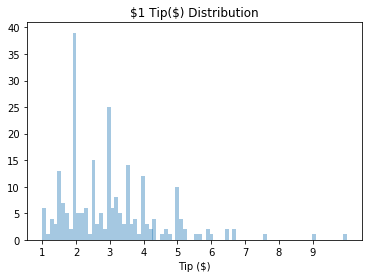

In [31]:
sns.distplot(tips['tip'], kde=False, bins=80);
plt.xticks(np.arange(1, 10, step=1.0))
plt.xlabel("Tip ($)")
plt.title("\\$1 Tip($) Distribution")
plt.show()

There are large peaks in the distribution at \\$1, \\$2, \\$3, \\$4 and \\$5. This suggest that people are tending to round their tips to the nearest dollar. This could simply be for convenience - it's much easier and quicker to count out a tip in dollars rather than cents. Or could be to do with using electronic way of payment like a card where you press a button to give a tip.

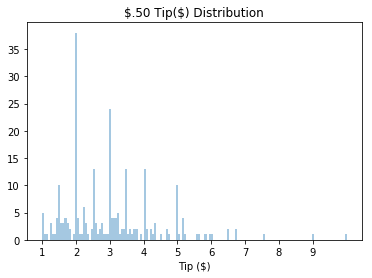

In [32]:
sns.distplot(tips['tip'], kde=False, bins=150);
plt.xticks(np.arange(1, 10, step=1.0))
plt.xlabel("Tip ($)")
plt.title("\\$.50 Tip($) Distribution")
plt.show()

Going a little deeper again, we can see there are also peaks around \\$1.50, \\$2.50 and \\$3.50. People also seem to be rounding to the nearest 50c. The outliers in the data are also really visible here.

## Investigating Tip and Total Bill <a class="ancor" id="tipBill"/>

### Tip and Total Bill <a class="ancor" id="tipBill1"/>

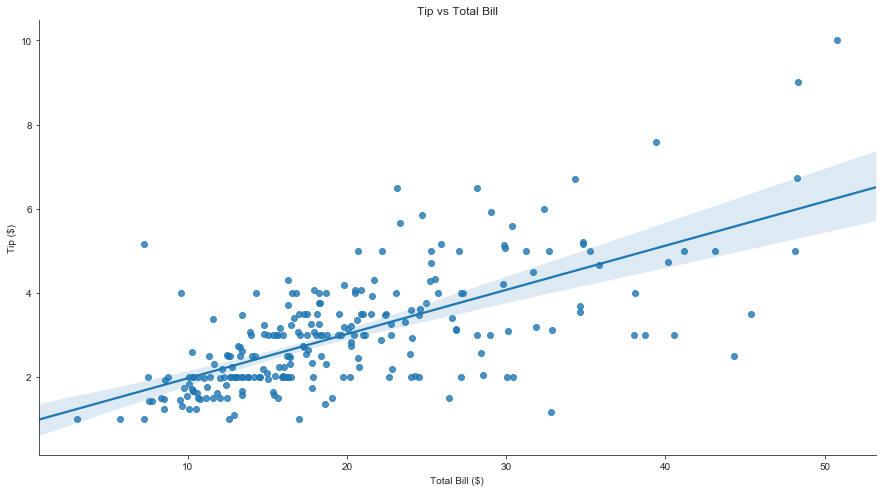

In [63]:
# [19]
sns.set_style('ticks')
g = sns.regplot(x="total_bill", y="tip", data=tips);
plt.xlabel("Total Bill (\\$)")
plt.ylabel("Tip (\\$)")
plt.title("Tip vs Total Bill")
# Making bigger for readablity
g.figure.set_size_inches(15, 8)
sns.despine()

In [62]:
# Calculate the correlation between the two
tips['tip'].corr(tips['total_bill']).round(2)

0.68

There are a lot more customers that are giving tips for lower total bills, than there are spending on bigger bills and tips. Again we can see how the data is skewed due to the few outliers we saw earlier when look at the distribution of the tips. You can also see the lines of tips at the \\$1 and 50c markers, indicating the rounding we saw earlier. There is a linear relationship as expected between the two variables. Looking at the plot, it looks to be about 15\% - 16\% or so, with a lot of the customers landing below the line rather than above it, or tipping below the 15\%. Maybe the service isn't great here?

## Tip and Total Bill by Gender <a class="ancor" id="tipBill2"/>

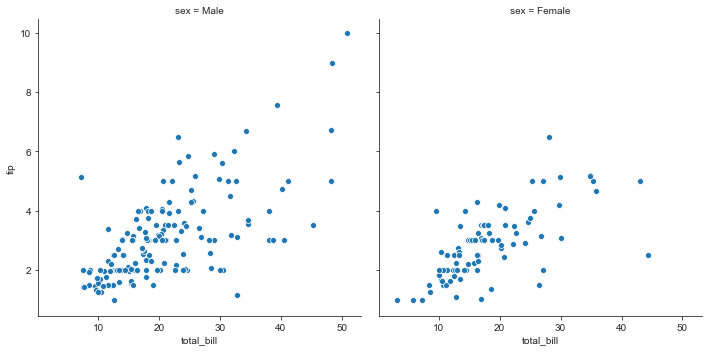

In [92]:
# Generates grid looking at relationship between 
# tip amount and total_bill by gender
sns.relplot(x="total_bill", y="tip", col="sex", data=tips);

In [103]:
# Calculating the correlation on the male values
m = tips.loc[tips["sex"]=="Male", "total_bill"]
tips['tip'].corr(m).round(2)

0.67

In [102]:
# Calculating the correlation on the female values
f = tips.loc[tips["sex"]=="Female", "total_bill"]
tips['tip'].corr(f).round(2)

0.68

Looking at the plot, we can see that there are more larger total bills paid for by males than females. The larger tips and total bills are paid for by males. The slope of the data also looks higher for males. We have looked at size yet, and we don't know much about the type of restaurant or context. Perhaps more tables of two might mean mean tipping higher on a date. It could also be a business lunch, we would need more information to know for sure.

## Tip and Total Bill by Gender and Smoking Table <a class="ancor" id="tipBill3"/>

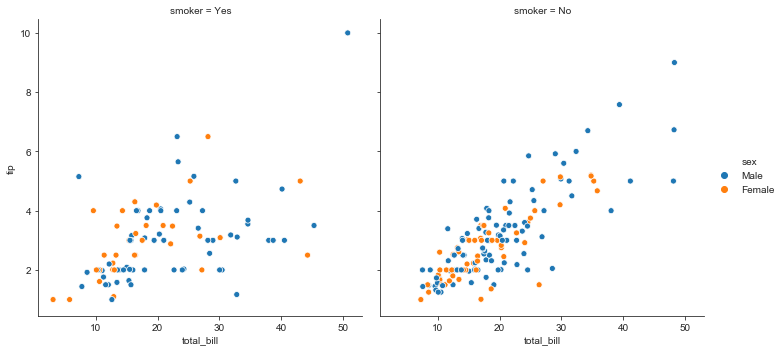

In [133]:
# Generates grid looking at relationship between
# tip amount and total_bill by gender and smoking status
sns.relplot(x="total_bill", y="tip", hue="sex", col="smoker", data=tips);

Smokers seem to be very erratic with lots of variability, there doesn't seem to be any consistent relationship amongst the smokers.

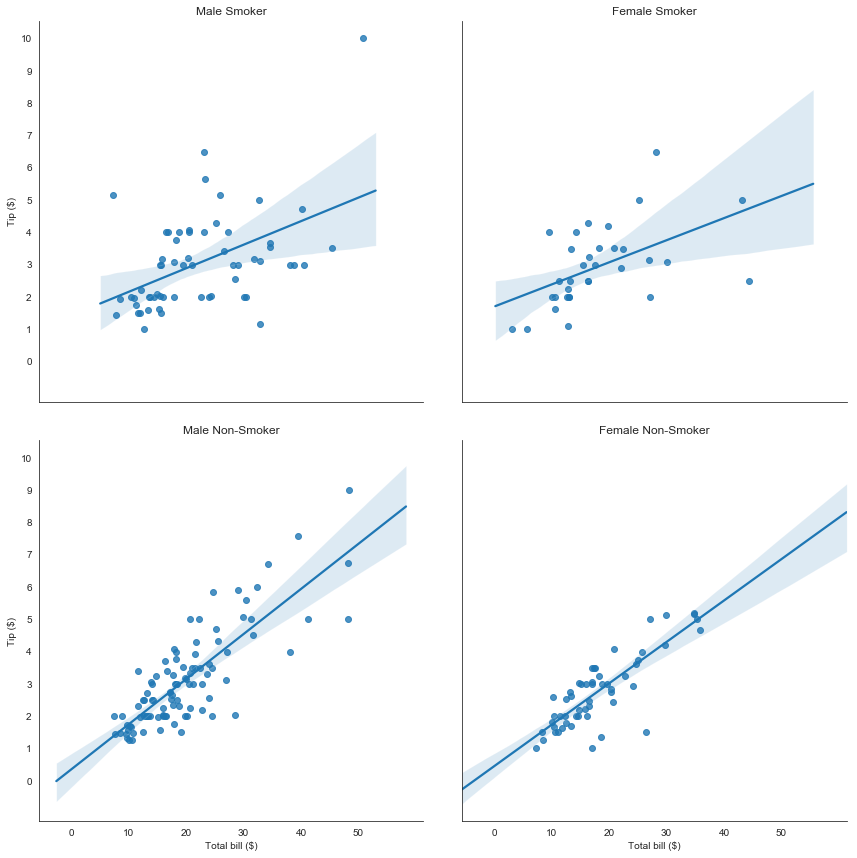

In [131]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="smoker", col="sex", height=6)
g.map(sns.regplot, "total_bill", "tip");
g.set_axis_labels("Total bill (\$)", "Tip (\$)");
axes = g.axes.flatten()
# Setting Ticks
plt.xticks(np.arange(0, 51, step=10.0))
plt.yticks(np.arange(0, 11, step=1.0))
# Set subplot titles
axes[0].set_title("Male Smoker")
axes[1].set_title("Female Smoker")
axes[2].set_title("Male Non-Smoker")
axes[3].set_title("Female Non-Smoker")
# Adding some space between plots
g.fig.subplots_adjust(wspace=.1, hspace=.1);
#[3]

When we split the data further it seems that female non-smokers seem to be the most consistent tippers looking at the clusters of their tips. There are 3 quite low tips amongst the female non-smokers, but otherwise they are very consistent. 

## Distribution of Tip Rate <a class="ancor" id="tiprate"/>

Text(0.5, 0, 'Tip Rate (%)')

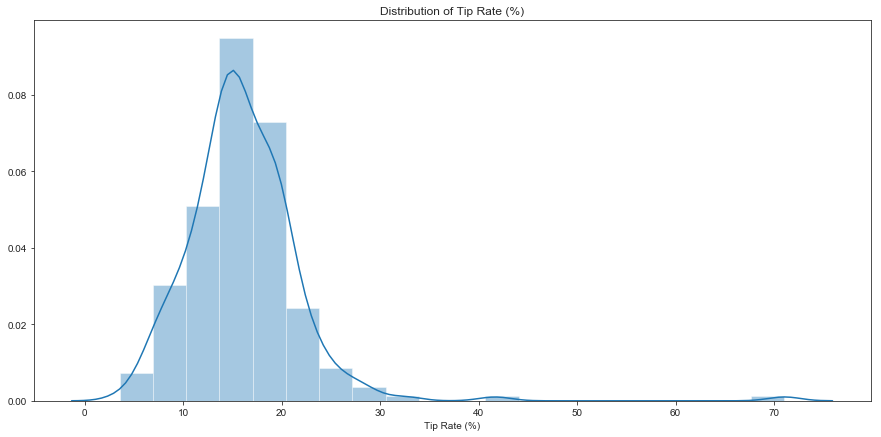

In [129]:
sns.distplot(tips["tiprate"], bins = 20)
plt.title("Distribution of Tip Rate (%)")
plt.xlabel("Tip Rate (%)")

In [136]:
# Getting all tips above 35% which would give us details about the outliers
tips[tips['tiprate']>=35.0]

,total_bill,tip,sex,smoker,day,time,size,tiprate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667


When we plot the distribution of tip rate, all of the data looks skewed. This is mainly due to the 2 larger tips we noted earlier. 

Sample 172 gave a tip of 71% - this was paid by a male smoker for a table of 2, at dinner on Sunday - he left a \\$5.15 tip on a bill of \\$7.25. 

Sample 178 gave a tip of 42% - this was paid by a female smoker for a table of 2, at dinner on Sunday - she left a tip of \\$4 on a bill of \\$9.60.

Text(0.5, 0, 'Tip Rate (%)')

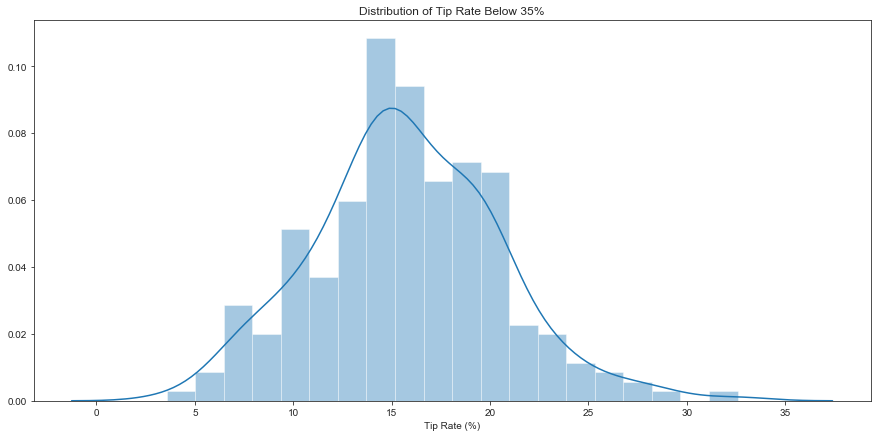

In [137]:
# all tips less than 35%
tiprate35 = tips.tiprate[tips['tiprate']<=35.0]
sns.distplot(tiprate35, bins=20)
plt.title("Distribution of Tip Rate Below 35%")
plt.xlabel("Tip Rate (%)")

When we remove the outliers (those tips above 35%), the distribution looks much more normally distributed.

Text(0.5, 0, 'Tip Rate (%)')

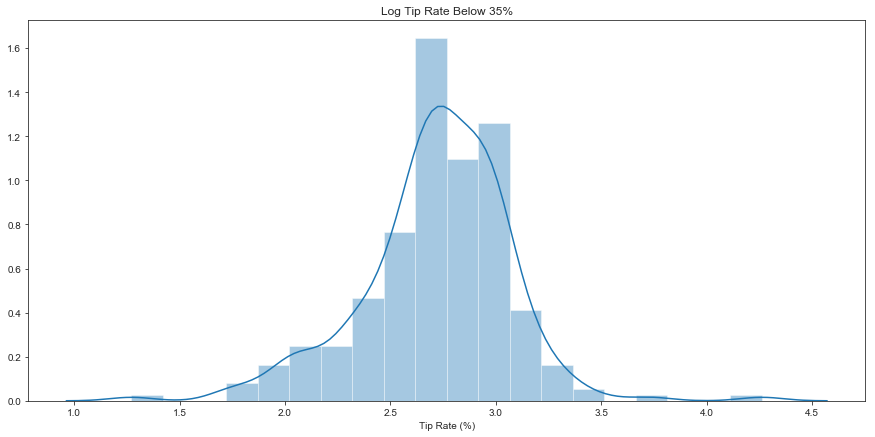

In [139]:
# Getting the log of tiprate to see if it has an effect on skew
logtiprate = np.log(tips.tiprate)
sns.distplot(logtiprate, bins = 20)
plt.title("Log Tip Rate Below 35%")
plt.xlabel("Tip Rate (%)")

## Sex vs Day of the week

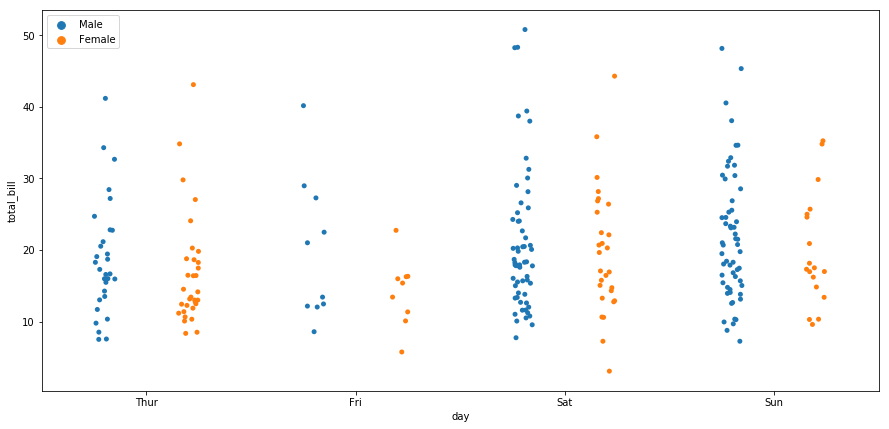

In [39]:
ax = sns.stripplot( x="day", y="total_bill", dodge=True, hue="sex", data=tips)
plt.legend(loc='upper left')

Here we see the distributions of the sex of the bill payers on the different days of the week. Thurs and fri seem equal enough. sat and sun seem to have more males than females paying the bills 

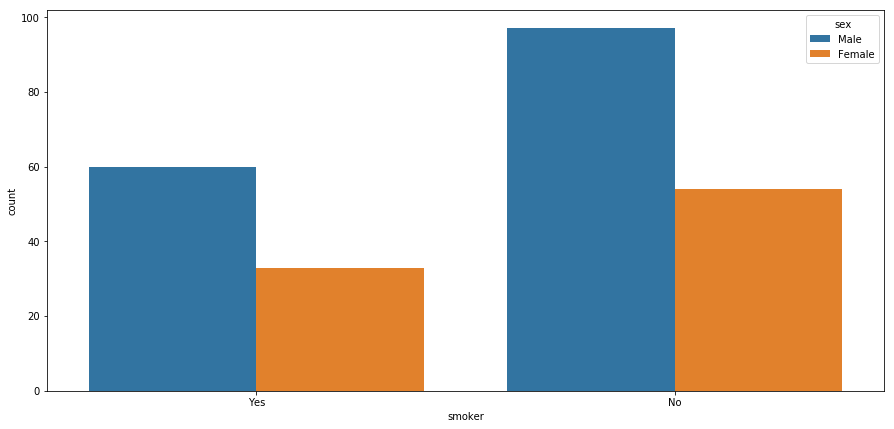

In [40]:
sns.countplot(x="smoker",data=tips,hue="sex")

Above there is a count plot looking at Smoking Party and Sex of the Bill Payer. There doesn't seem to be any relationship between Smoking and Sex as the rectangles are roughly equal and we know from above there were more male bill payers than female in general.

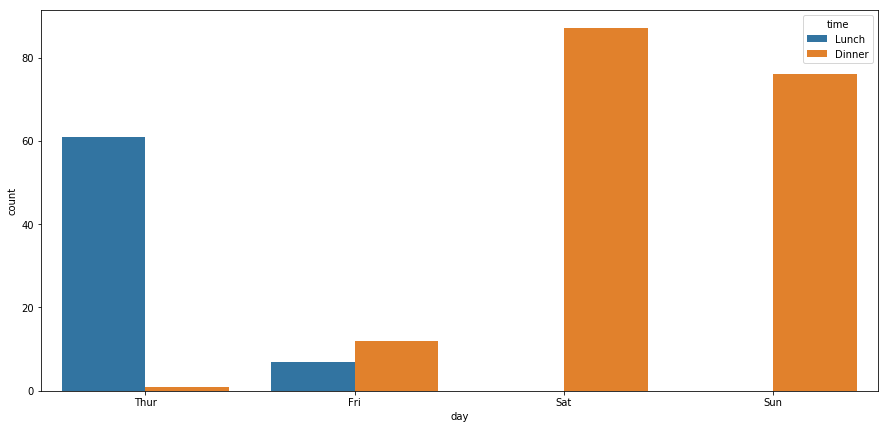

In [41]:
sns.countplot(x="day",data=tips,hue="time")

this is looking at day vs mealtime. no measurements were taken for lunch time on sat or sun. thurs has very few dinner time measurements and friday has similar numbers of both lunch and dinner time readings.

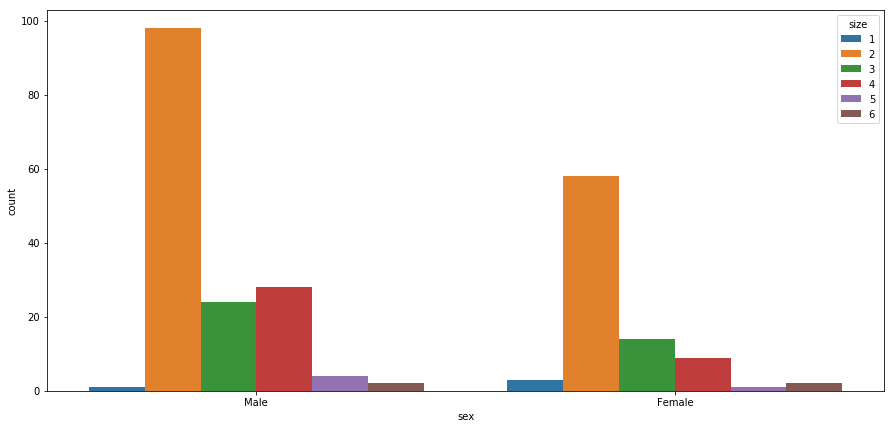

In [42]:
sns.countplot(x="sex",data=tips,hue="size")

as above stats show mostly parties of 2 with males paying for more of these bills that females. tables of 1, 5 and 6 not too frequent.

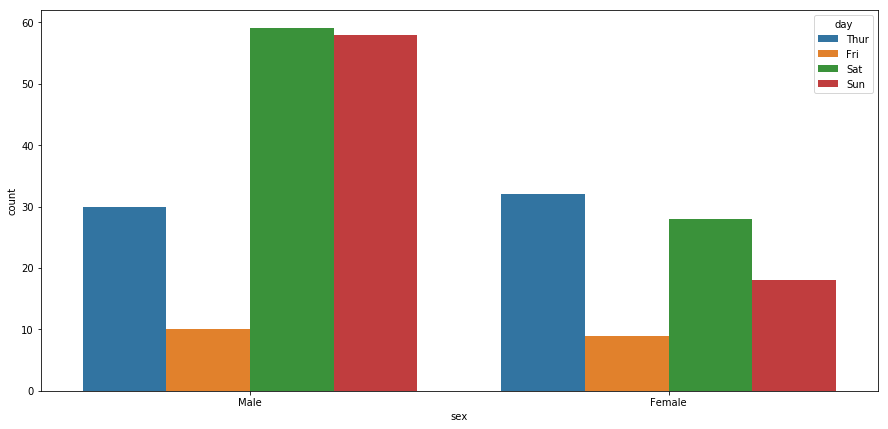

In [43]:
sns.countplot(x="sex",data=tips,hue="day")

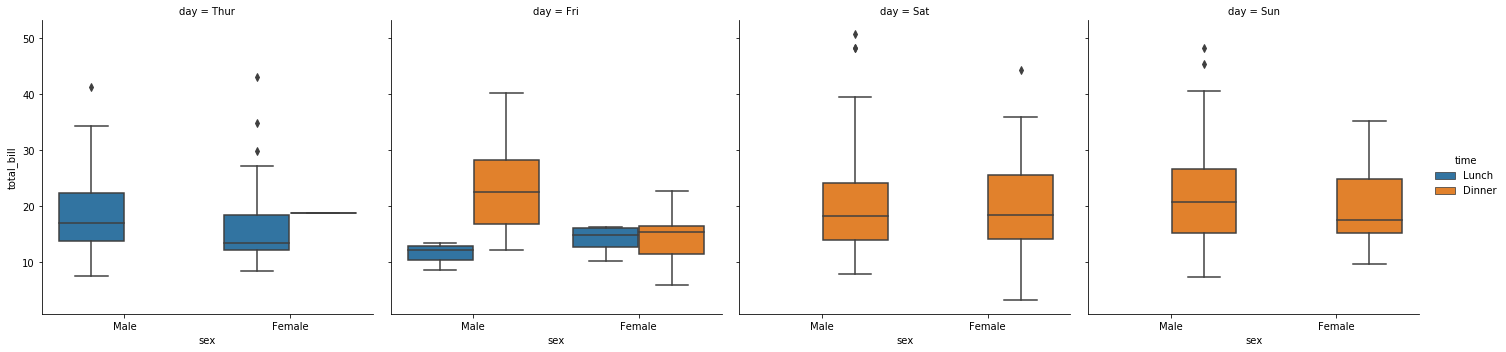

In [44]:
sns.catplot(x="sex", y="total_bill",hue="time", col="day",data=tips, kind="box")

males seem to be more likely to pay at the weekend

Using this plot it’s so simple to find changes in total_bill according to days. The total_bill is rising for male’s as the weekend arises while it decreases on Friday for females and jumps on Saturday and remains mostly constant on Sunday.

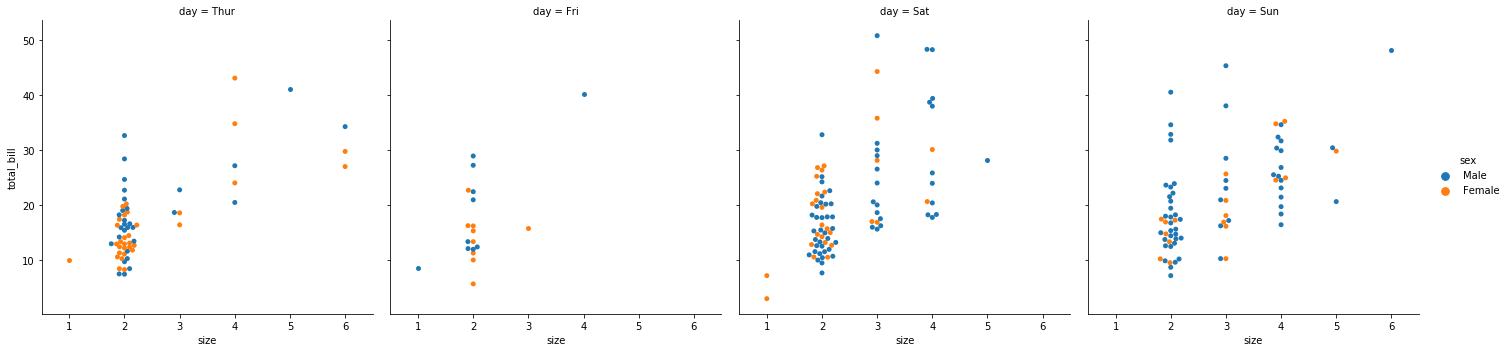

In [45]:
sns.catplot(x="size", y="total_bill",hue="sex", col="day",data=tips, kind="swarm")

Here we are looking at a plot with size of the party, day of the week and the sex of the bill payer. Here we see again (as seen above) that it is mostly tables of 2 with bigger tables of 3 and 4 more likely on saturday and sun. In general this seems to follow the trend of males getting the bill more often, with it seeming more likely on saturday and sunday (again maybe popular for dates?). Parties of 1 seems to depend on day of the week and don't seem too common - males on firday, mostly females on thurs and sat and no one dined alone on sun. Looking at tables of 3, thursday had roughly equal male and female bill payers, friday mostly female, saturday more males and sunday looks roughly equal. Tables of 4 equal enough on thursday, but more males friday to sunday. Tables of 5 and 6 are not that common in this resturant.


## Regression

In [46]:
pd.get_dummies(tips)
tips = pd.concat([pd.get_dummies(tips[['sex', 'smoker','day','time']]), tips[['total_bill', 'tip', 'size', 'tiprate']]], axis=1)


In [47]:
tips.head()

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,total_bill,tip,size,tiprate
0,0,1,0,1,0,0,0,1,0,1,16.99,1.01,2,5.944673
1,1,0,0,1,0,0,0,1,0,1,10.34,1.66,3,16.054159
2,1,0,0,1,0,0,0,1,0,1,21.01,3.50,3,16.658734
3,1,0,0,1,0,0,0,1,0,1,23.68,3.31,2,13.978041
4,0,1,0,1,0,0,0,1,0,1,24.59,3.61,4,14.680765


In [48]:
# omit Sun
from statsmodels.formula.api import ols
model = ols("tiprate ~ C(sex_Male) + C(smoker_Yes) + C(day_Thur) + C(day_Fri) + C(day_Sat) + C(time_Lunch) + size", data=tips)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tiprate   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.479
Date:                Wed, 23 Oct 2019   Prob (F-statistic):              0.175
Time:                        11:23:14   Log-Likelihood:                -781.99
No. Observations:                 244   AIC:                             1580.
Df Residuals:                     236   BIC:                             1608.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.9862      1.528     13.081      0.000      16.976      22.996
C(sex_Male)[T.1]      -0.8543      0.835     -1.023      0.307      -2.499       0.790
C(smoker_Yes)[T.1]     0.3637      0.850      0.428      0.669      -1.310       2.038
C(day_Thur)[T.1]      -3.4848      2.781     -1.253      0.211      -8.964       1.995
C(day_Fri)[T.1]       -1.6672      1.902     -0.876      0.382      -5.415       2.080
C(day_Sat)[T.1]       -1.8445      0.982     -1.878      0.062      -3.780       0.091
C(time_Lunch)[T.1]     2.3371      2.612      0.895      0.372      -2.808       7.483
size                  -0.9625      0.422     -2.282      0.023      -1.793      -0.132
==============================================================================
Omnibus:                      214.408   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7088.439
Skew:                           3.189   Prob(JB):                         0.00
Kurtosis:                      28.623   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# removing outlier tips
tips.tiprate[tips['tiprate']>35.0]

172    71.034483
178    41.666667
Name: tiprate, dtype: float64

In [50]:
tips = tips.drop([tips.index[172] , tips.index[178]])

In [51]:
X = tips['size']
Y = tips['tiprate']

X = sm.add_constant(X) # adding a constant


model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# model becomes tiprate 18.4 - 0.91 x size (coef column)
# tiprate drops from 18% by 1% for each extra person at the table

                            OLS Regression Results                            
Dep. Variable:                tiprate   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.034
Date:                Wed, 23 Oct 2019   Prob (F-statistic):             0.0258
Time:                        11:23:14   Log-Likelihood:                -715.75
No. Observations:                 242   AIC:                             1435.
Df Residuals:                     240   BIC:                             1442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5727      0.867     20.262      0.0

In [52]:
X = tips['size']
Y = tips['tiprate']

X = sm.add_constant(X) # adding a constant


model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# model becomes tiprate 17.5 - 0.7 x size

                            OLS Regression Results                            
Dep. Variable:                tiprate   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.034
Date:                Wed, 23 Oct 2019   Prob (F-statistic):             0.0258
Time:                        11:23:14   Log-Likelihood:                -715.75
No. Observations:                 242   AIC:                             1435.
Df Residuals:                     240   BIC:                             1442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5727      0.867     20.262      0.0

In [53]:
from statsmodels.formula.api import ols
model = ols("np.log(tiprate) ~ C(sex_Male) + C(smoker_Yes) + C(day_Thur) + C(day_Fri) + C(day_Sat) + C(time_Lunch) + size", data=tips)
results = model.fit()
results.summary()
# log is pretty much the same so we'll stick with untransformed~

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tiprate)   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.972
Date:                Wed, 23 Oct 2019   Prob (F-statistic):             0.0597
Time:                        11:23:14   Log-Likelihood:                -68.228
No. Observations:                 242   AIC:                             152.5
Df Residuals:                     234   BIC:                             180.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8795      0.083     34.720      0.000       2.716       3.043
C(sex_Male)[T.1]      -0.0475      0.045     -1.051      0.294      -0.136       0.042
C(smoker_Yes)[T.1]    -0.0940      0.046     -2.035      0.043      -0.185      -0.003
C(day_Thur)[T.1]      -0.1236      0.150     -0.826      0.410      -0.419       0.171
C(day_Fri)[T.1]        0.0519      0.103      0.504      0.615      -0.151       0.255
C(day_Sat)[T.1]       -0.0255      0.054     -0.476      0.635      -0.131       0.080
C(time_Lunch)[T.1]     0.1535      0.140      1.093      0.276      -0.123       0.430
size                  -0.0440      0.023     -1.934      0.054      -0.089       0.001
==============================================================================
Omnibus:                       27.698   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.162
Skew:                          -0.714   Prob(JB):                     1.90e-09
Kurtosis:                       4.395   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

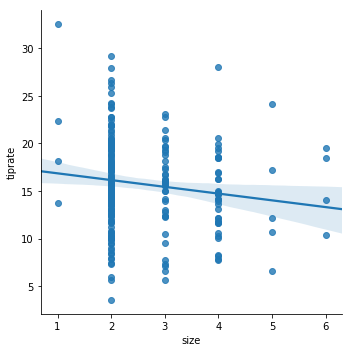

In [54]:
sns.lmplot(x="size", y="tiprate" ,data=tips)

Sex and smoking or not?

In [55]:
model = ols("tiprate ~ C(sex_Male)*C(smoker_Yes) + size + C(sex_Male) + C(smoker_Yes)", data=tips)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tiprate   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.833
Date:                Wed, 23 Oct 2019   Prob (F-statistic):            0.00488
Time:                        11:23:15   Log-Likelihood:                -710.68
No. Observations:                 242   AIC:                             1431.
Df Residuals:                     237   BIC:                             1449.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              17.4763      1.030     16.959      0.000      15.446      19.506
C(sex_Male)[T.1]                        0.4565      0.784      0.583      0.561      -1.087       2.000
C(smoker_Yes)[T.1]                      1.5543      1.034      1.503      0.134      -0.483       3.591
C(sex_Male)[T.1]:C(smoker_Yes)[T.1]    -3.4287      1.280     -2.678      0.008      -5.951      -0.907
size                                   -0.6882      0.315     -2.182      0.030      -1.309      -0.067
==============================================================================
Omnibus:                        4.735   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.422
Skew:                           0.278   Prob(JB):                        0.110
Kurtosis:                       3.359   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 0.18 tiprate
- minus 0.68% tip for each additional party memeber
- minus 0.45% for a female paying

- smoking party -1.55% in tip
- sex times smoker - if a female pays for a smoking bill +3% in tip. Roughly matches plots above!

coef are significantly different from 0, the model still doesn't really explain the enough about the variation in tiprate